In [9]:
import pandas as pd 
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 
from collections import Counter

In [10]:
sp = spotipy.Spotify() 

cid ="d062190fd93b4e4488e75ae2d9256814" 

secret = "5afbd4a19ee54607be0db6036fb417c2"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

sp.trace=False 

In [52]:
playlist_l = sp.user_playlist("Liked", "3cYqEaPBFyxqlXbViPtzDv?si=3553c6c98f714847") 
playlist_d = sp.user_playlist("Disliked", "4HC1kIY2bof1CHfZqmo8u1?si=080494e8e1bf4f75") 

In [15]:
liked_songs = playlist_l["tracks"]["items"] 

In [16]:
liked_ids = [] 
for i in range(len(liked_songs)): 
    liked_ids.append(liked_songs[i]["track"]["id"])

In [17]:
liked_features = sp.audio_features(liked_ids) 

[{'danceability': 0.271,
  'energy': 0.165,
  'key': 5,
  'loudness': -20.652,
  'mode': 1,
  'speechiness': 0.0351,
  'acousticness': 0.729,
  'instrumentalness': 1.6e-06,
  'liveness': 0.118,
  'valence': 0.203,
  'tempo': 77.082,
  'type': 'audio_features',
  'id': '29U7stRjqHU6rMiS8BfaI9',
  'uri': 'spotify:track:29U7stRjqHU6rMiS8BfaI9',
  'track_href': 'https://api.spotify.com/v1/tracks/29U7stRjqHU6rMiS8BfaI9',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/29U7stRjqHU6rMiS8BfaI9',
  'duration_ms': 139227,
  'time_signature': 4},
 {'danceability': 0.177,
  'energy': 0.215,
  'key': 3,
  'loudness': -9.886,
  'mode': 1,
  'speechiness': 0.0335,
  'acousticness': 0.807,
  'instrumentalness': 0.000125,
  'liveness': 0.0921,
  'valence': 0.0415,
  'tempo': 75.862,
  'type': 'audio_features',
  'id': '2MfwT3SKUyF0na2LCa2fCp',
  'uri': 'spotify:track:2MfwT3SKUyF0na2LCa2fCp',
  'track_href': 'https://api.spotify.com/v1/tracks/2MfwT3SKUyF0na2LCa2fCp',
  'analysis_url': 'http

In [18]:
liked_df = pd.DataFrame(liked_features)
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4
1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3
2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4
3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4
4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374,0.249,1,-10.985,1,0.0395,0.9360,0.008760,0.1140,0.0633,128.018,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4
96,0.588,0.362,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4
97,0.401,0.567,10,-9.131,1,0.0355,0.1710,0.008590,0.1030,0.3620,171.059,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3
98,0.626,0.308,6,-17.163,0,0.0294,0.8300,0.057800,0.1080,0.3230,129.928,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4


In [19]:
target = []

for i in range(liked_df.shape[0]):
    target.append(1)

In [20]:
liked_df['target'] = target
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374,0.249,1,-10.985,1,0.0395,0.9360,0.008760,0.1140,0.0633,128.018,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4,1
96,0.588,0.362,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4,1
97,0.401,0.567,10,-9.131,1,0.0355,0.1710,0.008590,0.1030,0.3620,171.059,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3,1
98,0.626,0.308,6,-17.163,0,0.0294,0.8300,0.057800,0.1080,0.3230,129.928,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4,1


In [21]:
disliked_songs = playlist_d["tracks"]["items"] 

In [22]:
disliked_ids = []
for i in range(len(disliked_songs)): 
    disliked_ids.append(disliked_songs[i]["track"]["id"])

In [53]:
disliked_features = sp.audio_features(disliked_ids) 

In [54]:
disliked_df = pd.DataFrame(disliked_features)
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.742,0.4970,0,-9.381,0,0.0746,0.24900,0.003350,0.0993,0.5580,156.013,audio_features,3dEtfTtCXWW7N8WQ9FD29z,spotify:track:3dEtfTtCXWW7N8WQ9FD29z,https://api.spotify.com/v1/tracks/3dEtfTtCXWW7...,https://api.spotify.com/v1/audio-analysis/3dEt...,310860,4
1,0.699,0.5880,9,-6.533,0,0.0402,0.00807,0.000131,0.1070,0.3500,151.971,audio_features,2TaWcNAkUM6buVOkL0CNh9,spotify:track:2TaWcNAkUM6buVOkL0CNh9,https://api.spotify.com/v1/tracks/2TaWcNAkUM6b...,https://api.spotify.com/v1/audio-analysis/2TaW...,199122,4
2,0.642,0.7230,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4
3,0.862,0.5060,10,-8.651,0,0.2670,0.05420,0.000030,0.1170,0.5120,136.052,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4
4,0.921,0.4320,0,-11.109,1,0.0502,0.50600,0.002230,0.0617,0.6930,112.117,audio_features,4Pv7OY4tfCA8KIdtlkANOS,spotify:track:4Pv7OY4tfCA8KIdtlkANOS,https://api.spotify.com/v1/tracks/4Pv7OY4tfCA8...,https://api.spotify.com/v1/audio-analysis/4Pv7...,178320,4
5,0.619,0.6720,0,-5.770,0,0.0468,0.23700,0.001490,0.1170,0.3360,163.942,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4
6,0.697,0.7190,7,-6.314,0,0.0571,0.50300,0.000000,0.1280,0.7510,86.000,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4
7,0.590,0.8650,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4
8,0.757,0.6960,11,-9.406,0,0.1610,0.09250,0.005510,0.1290,0.5260,93.003,audio_features,0O2zRCntGYssJk4bGn6dXk,spotify:track:0O2zRCntGYssJk4bGn6dXk,https://api.spotify.com/v1/tracks/0O2zRCntGYss...,https://api.spotify.com/v1/audio-analysis/0O2z...,210640,4
9,0.957,0.7170,8,-7.801,1,0.1730,0.12800,0.000000,0.0896,0.8550,116.020,audio_features,5JXUr2W37Xcg2KWBDTUKko,spotify:track:5JXUr2W37Xcg2KWBDTUKko,https://api.spotify.com/v1/tracks/5JXUr2W37Xcg...,https://api.spotify.com/v1/audio-analysis/5JXU...,87007,4


In [25]:
liked_target = []

for i in range(disliked_df.shape[0]):
    liked_target.append(0)

In [26]:
disliked_df['target'] = liked_target
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.742,0.4970,0,-9.381,0,0.0746,0.24900,0.003350,0.0993,0.5580,156.013,audio_features,3dEtfTtCXWW7N8WQ9FD29z,spotify:track:3dEtfTtCXWW7N8WQ9FD29z,https://api.spotify.com/v1/tracks/3dEtfTtCXWW7...,https://api.spotify.com/v1/audio-analysis/3dEt...,310860,4,0
1,0.699,0.5880,9,-6.533,0,0.0402,0.00807,0.000131,0.1070,0.3500,151.971,audio_features,2TaWcNAkUM6buVOkL0CNh9,spotify:track:2TaWcNAkUM6buVOkL0CNh9,https://api.spotify.com/v1/tracks/2TaWcNAkUM6b...,https://api.spotify.com/v1/audio-analysis/2TaW...,199122,4,0
2,0.642,0.7230,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4,0
3,0.862,0.5060,10,-8.651,0,0.2670,0.05420,0.000030,0.1170,0.5120,136.052,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4,0
4,0.921,0.4320,0,-11.109,1,0.0502,0.50600,0.002230,0.0617,0.6930,112.117,audio_features,4Pv7OY4tfCA8KIdtlkANOS,spotify:track:4Pv7OY4tfCA8KIdtlkANOS,https://api.spotify.com/v1/tracks/4Pv7OY4tfCA8...,https://api.spotify.com/v1/audio-analysis/4Pv7...,178320,4,0
5,0.619,0.6720,0,-5.770,0,0.0468,0.23700,0.001490,0.1170,0.3360,163.942,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4,0
6,0.697,0.7190,7,-6.314,0,0.0571,0.50300,0.000000,0.1280,0.7510,86.000,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4,0
7,0.590,0.8650,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4,0
8,0.757,0.6960,11,-9.406,0,0.1610,0.09250,0.005510,0.1290,0.5260,93.003,audio_features,0O2zRCntGYssJk4bGn6dXk,spotify:track:0O2zRCntGYssJk4bGn6dXk,https://api.spotify.com/v1/tracks/0O2zRCntGYss...,https://api.spotify.com/v1/audio-analysis/0O2z...,210640,4,0
9,0.957,0.7170,8,-7.801,1,0.1730,0.12800,0.000000,0.0896,0.8550,116.020,audio_features,5JXUr2W37Xcg2KWBDTUKko,spotify:track:5JXUr2W37Xcg2KWBDTUKko,https://api.spotify.com/v1/tracks/5JXUr2W37Xcg...,https://api.spotify.com/v1/audio-analysis/5JXU...,87007,4,0


In [27]:
#combining

frames = [liked_df, disliked_df]
  
result = pd.concat(frames).reset_index()
result

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0,0.271,0.1650,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,1,0.177,0.2150,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,2,0.530,0.4970,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,3,0.617,0.5670,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,4,0.214,0.3670,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,36,0.270,0.4740,5,-11.531,1,0.0337,0.6060,0.000000,0.4230,0.5240,79.144,audio_features,2ydyrhV1UFnNEIZjFAQqNF,spotify:track:2ydyrhV1UFnNEIZjFAQqNF,https://api.spotify.com/v1/tracks/2ydyrhV1UFnN...,https://api.spotify.com/v1/audio-analysis/2ydy...,203720,4,0
137,37,0.330,0.4390,10,-9.801,0,0.0410,0.6250,0.000368,0.1770,0.2100,175.676,audio_features,5NPg92vbjaGk4q9mh7MMEM,spotify:track:5NPg92vbjaGk4q9mh7MMEM,https://api.spotify.com/v1/tracks/5NPg92vbjaGk...,https://api.spotify.com/v1/audio-analysis/5NPg...,294532,4,0
138,38,0.679,0.1560,2,-13.920,1,0.0360,0.9080,0.000000,0.1030,0.2650,135.846,audio_features,6Qu9OC9o7f8QvTQtrWYdQX,spotify:track:6Qu9OC9o7f8QvTQtrWYdQX,https://api.spotify.com/v1/tracks/6Qu9OC9o7f8Q...,https://api.spotify.com/v1/audio-analysis/6Qu9...,234176,3,0
139,39,0.435,0.1590,7,-17.582,0,0.0494,0.9790,0.377000,0.1170,0.3320,109.076,audio_features,3m8Zy0Tw6Fl1RoWZLCnZT7,spotify:track:3m8Zy0Tw6Fl1RoWZLCnZT7,https://api.spotify.com/v1/tracks/3m8Zy0Tw6Fl1...,https://api.spotify.com/v1/audio-analysis/3m8Z...,416733,4,0


In [28]:
#shuffle
result = result.sample(frac = 1).reset_index()
result

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,25,25,0.730,0.2850,11,-15.103,0,0.0319,0.877,0.012600,...,0.2840,107.140,audio_features,3h9T2wLTy4FEKulLDkUjlX,spotify:track:3h9T2wLTy4FEKulLDkUjlX,https://api.spotify.com/v1/tracks/3h9T2wLTy4FE...,https://api.spotify.com/v1/audio-analysis/3h9T...,330747,4,1
1,81,81,0.724,0.4650,9,-8.088,1,0.0361,0.642,0.039000,...,0.3590,115.037,audio_features,1TQPsGG43vZTqPhWoa95HR,spotify:track:1TQPsGG43vZTqPhWoa95HR,https://api.spotify.com/v1/tracks/1TQPsGG43vZT...,https://api.spotify.com/v1/audio-analysis/1TQP...,185107,4,1
2,51,51,0.339,0.4300,0,-10.102,1,0.0440,0.667,0.031200,...,0.1260,105.236,audio_features,4FlR1nTr96hy7HK4OxY3aG,spotify:track:4FlR1nTr96hy7HK4OxY3aG,https://api.spotify.com/v1/tracks/4FlR1nTr96hy...,https://api.spotify.com/v1/audio-analysis/4FlR...,293267,4,1
3,85,85,0.728,0.4560,7,-7.930,1,0.0279,0.380,0.046700,...,0.1360,114.008,audio_features,60u9WxwtzTagxLsuDLD6eC,spotify:track:60u9WxwtzTagxLsuDLD6eC,https://api.spotify.com/v1/tracks/60u9WxwtzTag...,https://api.spotify.com/v1/audio-analysis/60u9...,275146,4,1
4,32,32,0.553,0.1900,2,-14.961,1,0.0298,0.903,0.000227,...,0.2990,100.002,audio_features,5OHbgQbHzTjolHzWffSrvn,spotify:track:5OHbgQbHzTjolHzWffSrvn,https://api.spotify.com/v1/tracks/5OHbgQbHzTjo...,https://api.spotify.com/v1/audio-analysis/5OHb...,239653,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,125,25,0.200,0.4660,9,-12.298,1,0.0486,0.557,0.702000,...,0.0572,136.913,audio_features,07eGxuz8bL6QMsRqEe1Adu,spotify:track:07eGxuz8bL6QMsRqEe1Adu,https://api.spotify.com/v1/tracks/07eGxuz8bL6Q...,https://api.spotify.com/v1/audio-analysis/07eG...,606850,5,0
137,12,12,0.653,0.5050,10,-7.102,0,0.0261,0.766,0.000008,...,0.3880,96.109,audio_features,7Dq7IjABZfw3LZDZRwPBEu,spotify:track:7Dq7IjABZfw3LZDZRwPBEu,https://api.spotify.com/v1/tracks/7Dq7IjABZfw3...,https://api.spotify.com/v1/audio-analysis/7Dq7...,228907,4,1
138,50,50,0.411,0.0595,3,-15.542,1,0.0357,0.974,0.000013,...,0.1340,78.560,audio_features,2i7XH68YyqN2pe1Om3rxsi,spotify:track:2i7XH68YyqN2pe1Om3rxsi,https://api.spotify.com/v1/tracks/2i7XH68YyqN2...,https://api.spotify.com/v1/audio-analysis/2i7X...,272041,3,1
139,11,11,0.535,0.0609,11,-17.805,1,0.0542,0.930,0.000144,...,0.1720,106.261,audio_features,7lY3juj1MLv4gjpRxkj27Z,spotify:track:7lY3juj1MLv4gjpRxkj27Z,https://api.spotify.com/v1/tracks/7lY3juj1MLv4...,https://api.spotify.com/v1/audio-analysis/7lY3...,224813,3,1


In [32]:
X = result.drop(["target", "level_0", "index", "type", "id", "uri", "track_href", "analysis_url"], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.730,0.2850,11,-15.103,0,0.0319,0.877,0.012600,0.1370,0.2840,107.140,330747,4
1,0.724,0.4650,9,-8.088,1,0.0361,0.642,0.039000,0.0637,0.3590,115.037,185107,4
2,0.339,0.4300,0,-10.102,1,0.0440,0.667,0.031200,0.2530,0.1260,105.236,293267,4
3,0.728,0.4560,7,-7.930,1,0.0279,0.380,0.046700,0.0855,0.1360,114.008,275146,4
4,0.553,0.1900,2,-14.961,1,0.0298,0.903,0.000227,0.0993,0.2990,100.002,239653,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.200,0.4660,9,-12.298,1,0.0486,0.557,0.702000,0.1080,0.0572,136.913,606850,5
137,0.653,0.5050,10,-7.102,0,0.0261,0.766,0.000008,0.0701,0.3880,96.109,228907,4
138,0.411,0.0595,3,-15.542,1,0.0357,0.974,0.000013,0.1850,0.1340,78.560,272041,3
139,0.535,0.0609,11,-17.805,1,0.0542,0.930,0.000144,0.1060,0.1720,106.261,224813,3


In [33]:
y = result["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
136    0
137    1
138    1
139    1
140    0
Name: target, Length: 141, dtype: int64

/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

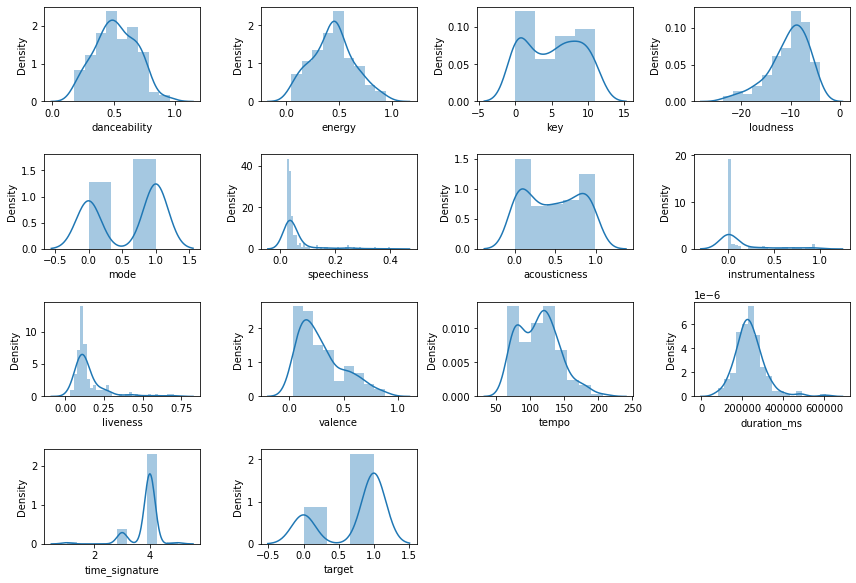

In [38]:
import seaborn as sns

numerical_features = result.select_dtypes(exclude=['object']).drop(['level_0', 'index'], axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna())
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='danceability', ylabel='Count'>

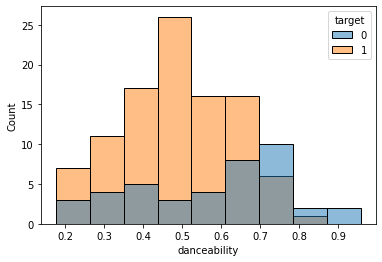

In [41]:
sns.histplot(data=result, x="danceability", hue="target")

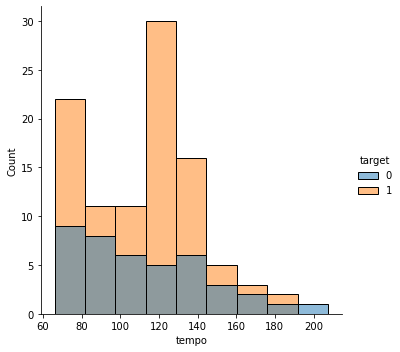

In [35]:
sns.displot(data=numerical_features, x="tempo", hue="target")

In [36]:
numerical_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,0.730,0.2850,11,-15.103,0,0.0319,0.877,0.012600,0.1370,0.2840,107.140,330747,4,1
1,0.724,0.4650,9,-8.088,1,0.0361,0.642,0.039000,0.0637,0.3590,115.037,185107,4,1
2,0.339,0.4300,0,-10.102,1,0.0440,0.667,0.031200,0.2530,0.1260,105.236,293267,4,1
3,0.728,0.4560,7,-7.930,1,0.0279,0.380,0.046700,0.0855,0.1360,114.008,275146,4,1
4,0.553,0.1900,2,-14.961,1,0.0298,0.903,0.000227,0.0993,0.2990,100.002,239653,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.200,0.4660,9,-12.298,1,0.0486,0.557,0.702000,0.1080,0.0572,136.913,606850,5,0
137,0.653,0.5050,10,-7.102,0,0.0261,0.766,0.000008,0.0701,0.3880,96.109,228907,4,1
138,0.411,0.0595,3,-15.542,1,0.0357,0.974,0.000013,0.1850,0.1340,78.560,272041,3,1
139,0.535,0.0609,11,-17.805,1,0.0542,0.930,0.000144,0.1060,0.1720,106.261,224813,3,1


In [42]:
columns = []

for col in X.columns:
    columns.append(col)


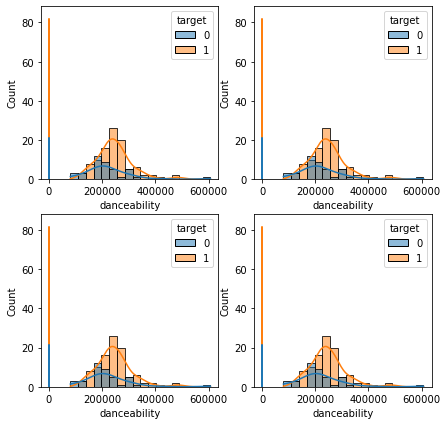

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

for i in range(0, 2):
    for j in range(0, len(columns)):
        for k in range(0, 2):
            sns.histplot(data=result, x=columns[j], kde=True, color="skyblue", hue="target", ax=axs[i, k])

In [37]:
import matplotlib.pyplot as plt

color = []

for i in range(0, len(y)):
    if y[i] == 0:
        color.append("blue")
    else:
        color.append("magenta")

In [ ]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[0]][i], c=color[i], s=10, linewidth = 0)
    

In [ ]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[1]][i], c=color[i], s=10, linewidth = 0)

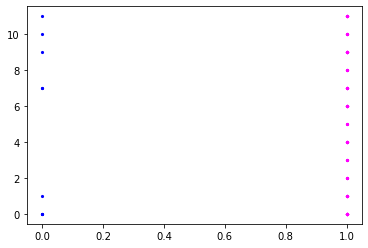

In [98]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[2]][i], c=color[i], s=10, linewidth = 0)